https://rreusser.github.io/strange-attractors/#liuchen

$$
\dot x = .4x - yz\\
\dot y = -12y + xz\\
\dot y = -5z + xy\\
$$

In [1]:
import open3d as o3d

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.integrate import solve_ivp

In [26]:
def dFdt(t, xyz):
    x, y, z = xyz
    dxdt =  .4*x - y*z
    dydt = -12*y + x*z
    dzdt =  -5*z + x*y
    return [dxdt, dydt, dzdt]

In [27]:
t_span = (0, 120)
xyz_zero = np.array([-1.7, -0.1, 0])

sol = solve_ivp(dFdt, t_span, xyz_zero,
                vectorized=True, dense_output=True,
                max_step=2, method='RK23')
xyz = sol.y.T

print(xyz.shape)

(1415, 3)


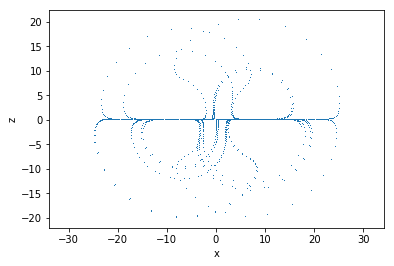

In [28]:
plt.plot(xyz[:, 0], xyz[:, 2], ',');
plt.axis('equal'); plt.xlabel('x');
plt.ylabel('z');

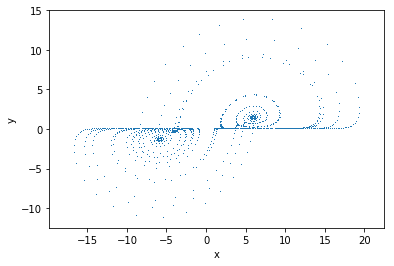

In [20]:
plt.plot(xyz[:, 0], xyz[:, 1], ',');
plt.axis('equal'); plt.xlabel('x');
plt.ylabel('y');

In [32]:
alpha = 7

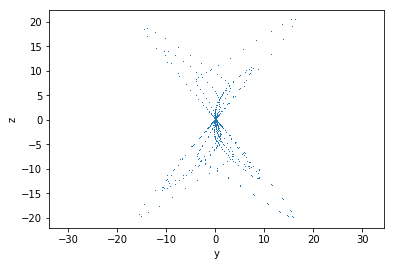

In [34]:
plt.plot(xyz[:, 1], xyz[:, 2], ',');
#plt.plot([-10, 10], -7*np.array([-10, 10]));
plt.axis('equal'); plt.xlabel('y');
plt.ylabel('z');

In [35]:
points = [[0, 0, -30], [0, 0, 30]]
lines = [[0, 1], ]
colors = [[1, 0, 0] for i in range(len(lines))]
line_z = o3d.geometry.LineSet()
line_z.points = o3d.utility.Vector3dVector(points)
line_z.lines = o3d.utility.Vector2iVector(lines)
line_z.colors = o3d.utility.Vector3dVector(colors)

points = [[-40, 0, 0], [40, 0, 0]]
lines = [[0, 1], ]
colors = [[.3, .7, 1] for i in range(len(lines))]
line_x = o3d.geometry.LineSet()
line_x.points = o3d.utility.Vector3dVector(points)
line_x.lines = o3d.utility.Vector2iVector(lines)
line_x.colors = o3d.utility.Vector3dVector(colors)

In [36]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

In [37]:
o3d.visualization.draw_geometries([pcd, line_z, line_x])